<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Processamento_de_Linguagem_Natural_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NLP 

1. Bibliotecas : NLTK/spaCy

Obs¹: A spaCy tem uma aplicação mais interessante do que a NLTK
  
- Busca de Textos
- Extração de entidades nomeadas
- Wordcloud
- classificação de sentimentos

In [2]:
!python -m spacy download pt_core_news_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-13 16:01:43.440675: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-13 16:01:43.440796: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-13 16:01:43.440816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [3]:
!python -m spacy download pt_core_news_lg

import bs4 as bs # processamento de dados da web (texto)
import urllib.request 
import nltk 
import spacy
import pt_core_news_lg

In [4]:
pln = spacy.load('pt_core_news_lg')
pln

In [5]:
documento = pln('Estou aprendendo processamento de linguagem natural em São Paulo')
type(documento)

spacy.tokens.doc.Doc

In [6]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
em ADP
São PROPN
Paulo PROPN


In [7]:
# Lematização e Stemização

for token in documento:
  print(token.text, token.lemma_)

print('\n------\n')

# a lemmatização trabalha com os 'radicais' das palavras. Legal para redimensionar um texto muito grande
# Diferente da Stemização a Lemmatização é mais segura e garante que o sentido das palavras sejam mantidos

doc = pln('encontrei encontraria encontrou encontrado curso cursei cursado')
[token.lemma_ for token in doc]

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
em em
São São
Paulo Paulo

------



['encontrei',
 'encontrar',
 'encontrar',
 'encontrar',
 'curso',
 'cursei',
 'cursar']

In [8]:
nltk.download('rslp')
# faz a stemização (stemmers)

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [9]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("aprender")

'aprend'

### Extraindo *dados*

In [10]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [11]:
dados = dados.read()
dados # o resultado é a leitura do código fonte da página que desejamos analisar

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limite

In [12]:
dados_html = bs.BeautifulSoup(dados, 'lxml') # ocorre a leitura da marcação
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){va

In [13]:
paragrafos = dados_html.find_all('p')

In [14]:
len(paragrafos) # 110 parágrafos
paragrafos[0]

<p>
				Páginas para editores sem sessão iniciada <a aria-label="Saiba mais sobre edição" data-mw="interface" href="/wiki/Ajuda:Introduction"><span>saber mais</span></a>
</p>

In [15]:
for p in paragrafos:
  print(p) # printando todos os parágrafos.

<p>
				Páginas para editores sem sessão iniciada <a aria-label="Saiba mais sobre edição" data-mw="interface" href="/wiki/Ajuda:Introduction"><span>saber mais</span></a>
</p>
<p>Na <a href="/wiki/Tecnologia" title="Tecnologia">tecnologia</a>, a <b>Inteligência Artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>Artificial Intelligence</i>, de sigla: <b>AI</b>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> demonstrada por <a href="/wiki/M%C3%A1quina" title="Máquina">máquinas</a> ao executar tarefas complexas associadas a seres inteligentes,<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span>[</span>1<span>]</span></a></sup> além de também ser um campo de estudo acadêmico,<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span>[</span>2<span>]</span></a></sup> no qual o principal objetivo é de executar funções de modo autônomo. 
</p>
<p>É um conceito amplo e que recebe 

In [16]:
for p in paragrafos:
  print(p.text) # retorna o texto puro de todos os parágrafos


				Páginas para editores sem sessão iniciada saber mais

Na tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. 

É um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]

O desenvol

In [17]:
conteudo = ''

# extraíndo o conteúdo completo da página 
for p in paragrafos:
  conteudo += p.text

In [18]:
conteudo

'\n\t\t\t\tPáginas para editores sem sessão iniciada saber mais\nNa tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\nO de

In [19]:
conteudo = conteudo.lower()
conteudo

'\n\t\t\t\tpáginas para editores sem sessão iniciada saber mais\nna tecnologia, a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\no de

In [20]:
string = "turing"
token_pesquisa = pln(string)

from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(pln.vocab)
matcher.add ("SEARCH", None, token_pesquisa)

In [21]:
doc = pln(conteudo)
matches = matcher(doc)
matches

# retorna os indices em que a palavra "Turing" foi encontrada (foi encontrda 12 vezes)

"""
                        I1     I2
[(8661325627334373315, 3361, 3362),
 (8661325627334373315, 3371, 3372),
 (8661325627334373315, 3527, 3528),
 (8661325627334373315, 3532, 3533),
 (8661325627334373315, 3538, 3539),
 (8661325627334373315, 3601, 3602),
 (8661325627334373315, 4228, 4229),
 (8661325627334373315, 5493, 5494),
 (8661325627334373315, 8944, 8945),
 (8661325627334373315, 9079, 9080),
 (8661325627334373315, 9174, 9175),
 (8661325627334373315, 9291, 9292)]
"""

[(8661325627334373315, 3361, 3362),
 (8661325627334373315, 3371, 3372),
 (8661325627334373315, 3527, 3528),
 (8661325627334373315, 3532, 3533),
 (8661325627334373315, 3538, 3539),
 (8661325627334373315, 3601, 3602),
 (8661325627334373315, 4228, 4229),
 (8661325627334373315, 5493, 5494),
 (8661325627334373315, 8944, 8945),
 (8661325627334373315, 9079, 9080),
 (8661325627334373315, 9174, 9175),
 (8661325627334373315, 9291, 9292)]

In [24]:
doc[3361:3362], doc[3361-5:3362+5]

(turing, uma contribuição prática de alan turing foi o que se chamou)

In [35]:
from IPython.core.display import HTML

np = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados Encontrados:</strong> {len(matches)}</p>"""))

for i in matches:
  inicio = i[1] - np
  
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + np]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""...{texto}..."""))

### Extração de Entidades Nomeadas (NER) : _Named-Entity Recognition_

- Aplicado por chatobots para saber sobre qual a entidade de assunto

In [36]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

segunda guerra mundial MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch, PER
walter pitts PER
google ORG
john mccarthy PER
alexandre PER
herbert simon PER
john mccarthy PER
newell PER
gps MISC
brasil LOC
allen newell PER
herbert simon PER
mccarty LOC
mit ai lab MISC
darthmouth LOC
estados unidos LOC
fifth generation project” MISC
japão LOC
andreas kaplan PER
michael haenlein PER
john mccarthy PER
darmouth LOC
john PER
w. grey walter PER
besta de johns hopkins. LOC
universidade de princeton ORG
club ORG
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
asimov PER
stephen hawking PER
alan turing PER
tt ORG
tt ORG
turing PER
turing PER
turing PER
tommy flowers PER
java MISC
john searle PER
hubert PER
searle PER
minsky PER
turing PER
mit ORG
mark i MISC
frank rosenblatt, PER
charles wightman PER
lucien sfez PER
sherry turkle PER
daniel dennett PER
dennett PER
simon blackburn PER
searle PER
minsky PER
minsky PER
rosenblatt PER
bernar

In [37]:
from spacy import displacy

displacy.render(doc, style = "ent", jupyter=True)

### Nuvens de Palavras

In [43]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'tu', 'pegar', 'possível', 'quarto', 'corrente', 'tal', 'estão', 'certeza', 'boa', 'nunca', 'pois', 'dezanove', 'diante', 'tais', 'como', 'isso', 'foram', 'fazia', 'pode', 'dentro', 'número', 'irá', 'se', 'às', 'aqui', 'daquele', 'portanto', 'até', 'fui', 'porém', 'veja', 'aí', 'desde', 'vos', 'esta', 'apoia', 'tive', 'tudo', 'você', 'suas', 'mas', 'neste', 'minhas', 'vosso', 'teus', 'debaixo', 'possivelmente', 'lugar', 'da', 'vêm', 'pouco', 'meses', 'tão', 'nível', 'enquanto', 'essa', 'eu', 'menos', 'esses', 'outra', 'porquê', 'quem', 'nova', 'lá', 'parece', 'nossa', 'usa', 'das', 'meio', 'pelos', 'estive', 'próxima', 'oitavo', 'longe', 'fora', 'uma', 'sua', 'tivestes', 'após', 'outros', 'mal', 'questão', 'depois', 'nas', 'coisa', 'são', 'sabe', 'os', 'demais', 'dar', 'para', 'zero', 'onze', 'treze', 'é', 'exemplo', 'mil', 'vai', 'fará', 'daquela', 'estivemos', 'não', 'sete', 'ao', 'quê', 'novas', 'o', 'teve', 'então', 'uns', 'usar', 'perto', 'sexta', 'dez', 'ora', 'tens', 'vão', 'po

In [44]:
len(STOP_WORDS)

416

In [45]:
doc = pln(conteudo)
lista_token = []

for token in doc:
  lista_token.append(token.text)
print(lista_token)

['\n\t\t\t\t', 'páginas', 'para', 'editores', 'sem', 'sessão', 'iniciada', 'saber', 'mais', '\n', 'na', 'tecnologia', ',', 'a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'a', 'inteligência', 'demonstrada', 'por', 'máquinas', 'ao', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes,[1', ']', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico,[2', ']', 'no', 'qual', 'o', 'principal', 'objetivo', 'é', 'de', 'executar', 'funções', 'de', 'modo', 'autônomo', '.', '\n', 'é', 'um', 'conceito', 'amplo', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[3', ']', 'é', 'possível', 'considerar', 'algumas', 'características', 'básicas', 'desses', 'sistemas', ',', 'como', 'a', 'capacidade', 'de', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'um', 'conjunto', 'de

In [47]:
sem_stop = []

for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [39]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'red', 'green', 'magenta'])

In [40]:
from wordcloud import WordCloud
cloud = WordCloud(background_color ='white', max_words = 100, colormap=color_map)

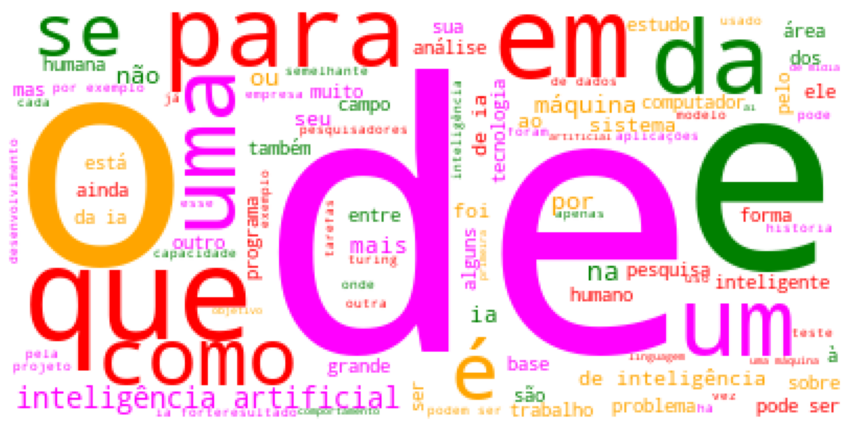

In [42]:
import matplotlib.pyplot as plt 
cloud = cloud.generate(conteudo)
plt.figure(figsize=(15,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()

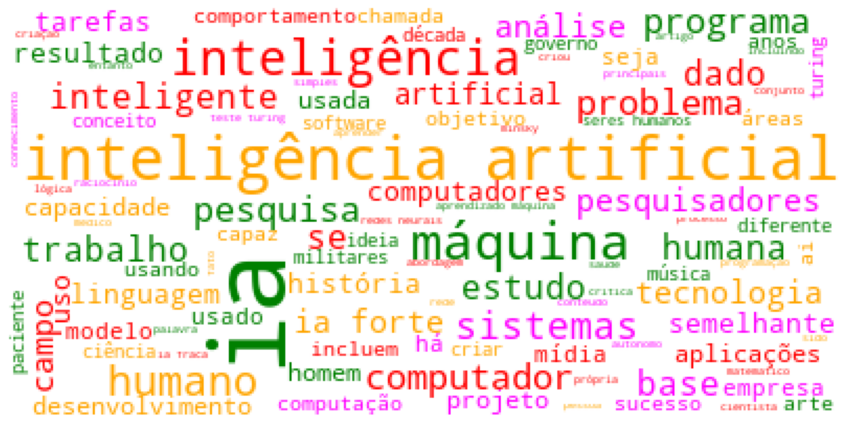

In [49]:
# usando apenas as não stop words

cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()